# Taller Identificación de hongos venenosos usando regresión logística

Construya un modelo de regresión logística que permita identificar si un hongo es venenoso o no. Para ello, utilice la muestra de datos suministrada.

La base de datos contiene 8124 instancias de hongos provenientes de 23 especies de la familia Agaricus y Lepiota, los cuales han sido clasificados como comestibles, venenosos o de comestibilidad indeterminada. Por el tipo de problema en cuestión, los hongos de comestibilidad desconocida deben ser asignados a la clase de hongos venenosos, ya que no se puede correr el riesgo de dar un hongo potencialmente venenoso a una persona para su consumo.

Véase https://www.kaggle.com/uciml/mushroom-classification

Evalue el modelo usando la matriz de confusión.

La información contenida en la muestra es la siguiente:

1. Importación de Datos y Exploración

In [1]:
#
# Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix


# Carga de la muestra de datos.
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/mushrooms.csv"
)

In [ ]:
# Exploracion Datos - Visualizacion de las columnas
df.columns

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [ ]:
# Exploracion Datos - Visualizacion de una muetra de datos
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


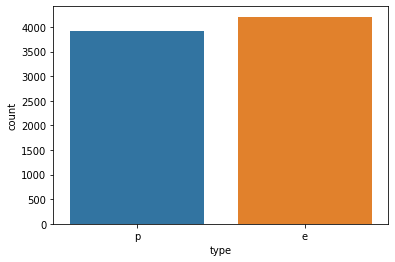

In [ ]:
# Exploracion Datos - Distribución de la variable objetivo
sns.countplot(data=df,x='type')

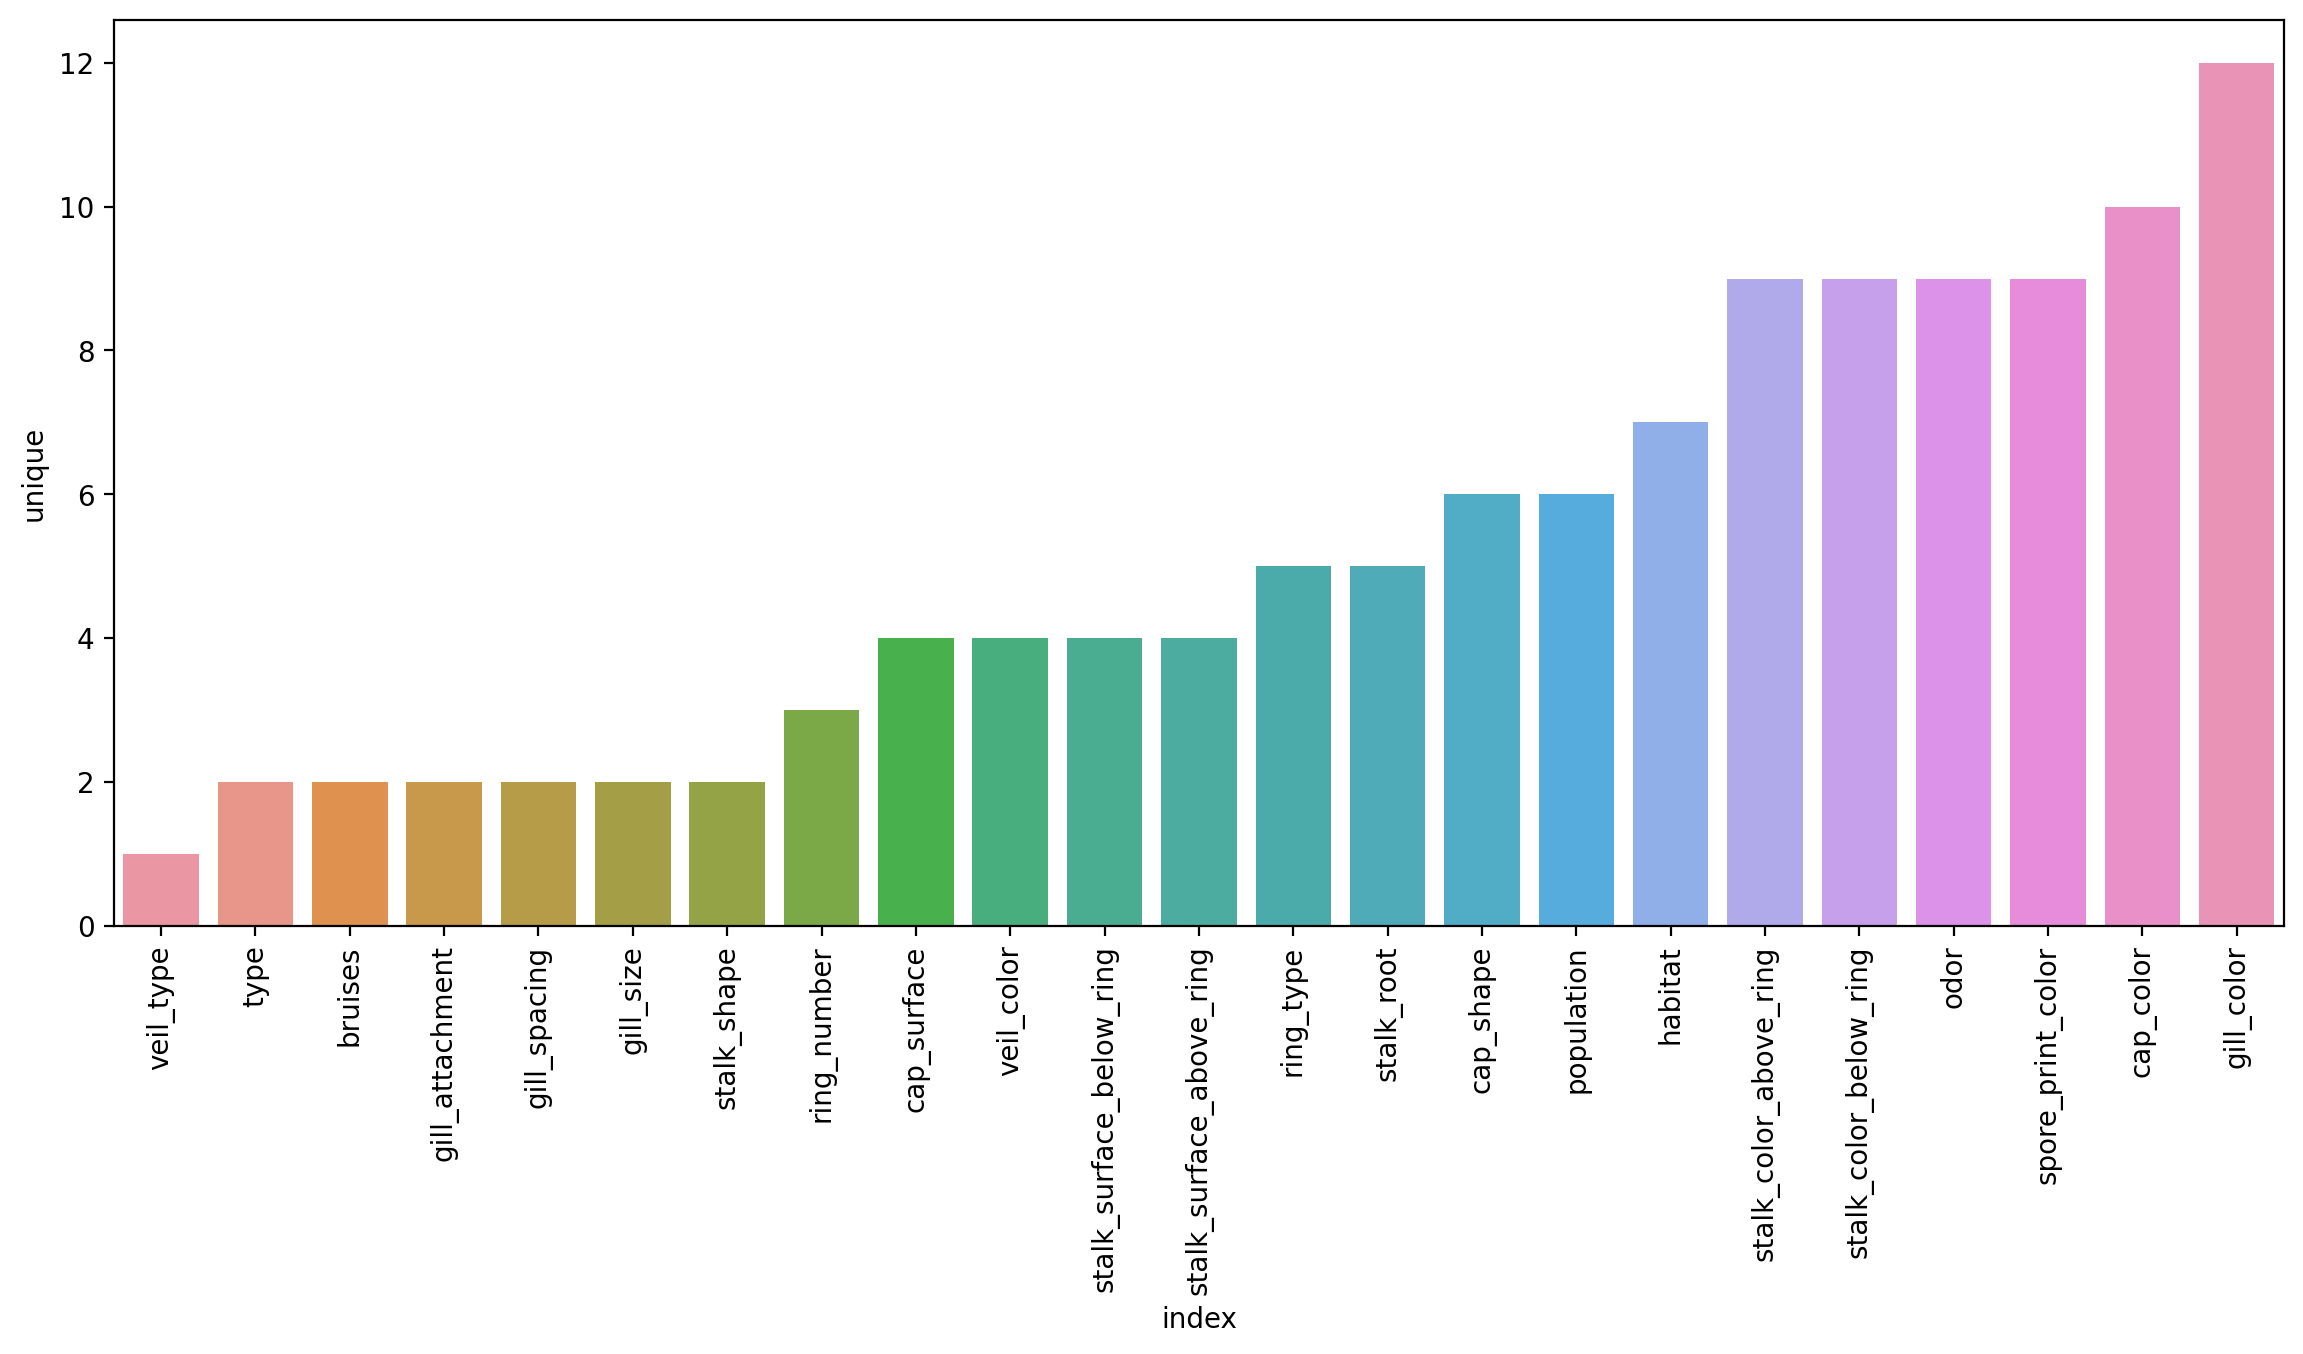

In [ ]:
# Exploracion Datos - Distribución valores únicos x variable
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

2. Creación y Evaluación del Modelo

In [2]:
# Para construir el modelo elimine la columna 'veil_type' ya que contiene un único valor.
df.drop('veil_type', axis=1, inplace=True)

# Creamos una copia del df
x = df.copy()
# Reemplazamos en y las p y e por 1 y 0 
x['type'] = x['type'].replace('p',1).replace('e',0)
y = x['type']
# Eliminamos la columna Target (type), para crear los x
x.drop('type', axis=1, inplace=True)

# Preprocesamos los datos usando one-hot-encoder.
oneHotEncoder = OneHotEncoder(
    categories="auto",
    drop=None,
    dtype=np.int64,
    handle_unknown="error",
)
oneHotEncoder.fit(x)
x2 = oneHotEncoder.fit_transform(x)

# Implementacion del modelo
logisticRegression = LogisticRegression(
    penalty="none",
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    random_state=None,
    solver="lbfgs",
    max_iter=100,
    multi_class="auto",
    verbose=0,
    warm_start=False,
    l1_ratio=None,
)
# Entrenamos
logisticRegression.fit(x2, y)
# Pronosticamos
y_pred = logisticRegression.predict(x2)

# Creacion de la matriz de confusión
cm = confusion_matrix(y_pred,y)
print(cm)

[[4208    0]
 [   0 3916]]


In [3]:
# ---->>> Evaluación ---->>>
# cm es la matriz de confusion
print(cm[0][0] == 4208)
print(cm[0][1] == 0)
print(cm[1][0] == 0)
print(cm[1][1] == 3916)

True
True
True
True
